In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
# Data preprocessing
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
X = data.iloc[:,2:4].values
y = data.iloc[:,-1:].values

# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Scale the variable
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='rbf', random_state=0)

svc_clf.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

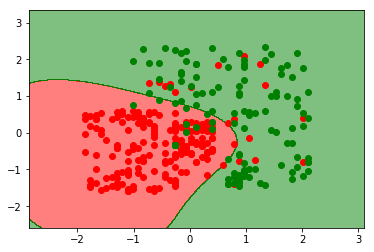

In [19]:
# Plot the training results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1,X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01), np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, svc_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('Red', 'Green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.where(y_set==i),0], X_set[np.where(y_set==i), 1], c=ListedColormap(('Red', 'Green'))(i))

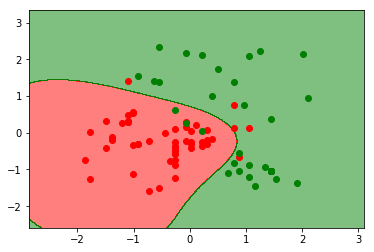

In [20]:
# Plot the training results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1,X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01), np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, svc_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('Red', 'Green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.where(y_set==i),0], X_set[np.where(y_set==i), 1], c=ListedColormap(('Red', 'Green'))(i))